In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv', low_memory = False)

### Data Cleaning and manipulation

In [3]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(2074192, 29)

In [5]:
df.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           645358
ZIP CODE                          645608
LATITUDE                          233550
LONGITUDE                         233550
LOCATION                          233550
ON STREET NAME                    440220
CROSS STREET NAME                 783802
OFF STREET NAME                  1726345
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6793
CONTRIBUTING FACTOR VEHICLE 2     321453
CONTRIBUTING FACTOR VEHICLE 3    1926028
CONTRIBUTING FACTOR VEHICLE 4    2040747
CONTRIBUTING FACTOR VEHICLE 5    2065131
COLLISION_ID                           0
VEHICLE TYPE COD

In [6]:
df = df.dropna(subset = ['ZIP CODE', 'LATITUDE', 'LONGITUDE', 'BOROUGH'])
df.shape

(1391729, 29)

In [7]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
3,09/11/2021,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
7,12/14/2021,8:17,BRONX,10475,40.868160,-73.831480,"(40.86816, -73.83148)",NaN,NaN,344 BAYCHESTER AVENUE,...,Unspecified,NaN,NaN,NaN,4486660,Sedan,Sedan,NaN,NaN,NaN
8,12/14/2021,21:10,BROOKLYN,11207,40.671720,-73.897100,"(40.67172, -73.8971)",NaN,NaN,2047 PITKIN AVENUE,...,Unspecified,NaN,NaN,NaN,4487074,Sedan,NaN,NaN,NaN,NaN
9,12/14/2021,14:58,MANHATTAN,10017,40.751440,-73.973970,"(40.75144, -73.97397)",3 AVENUE,EAST 43 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4486519,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


In [8]:
df['BOROUGH'].unique()

array(['BROOKLYN', 'BRONX', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'],
      dtype=object)

In [9]:
df.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                                0
ZIP CODE                               0
LATITUDE                               0
LONGITUDE                              0
LOCATION                               0
ON STREET NAME                    306722
CROSS STREET NAME                 307257
OFF STREET NAME                  1085559
NUMBER OF PERSONS INJURED             11
NUMBER OF PERSONS KILLED              23
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       5070
CONTRIBUTING FACTOR VEHICLE 2     227885
CONTRIBUTING FACTOR VEHICLE 3    1305117
CONTRIBUTING FACTOR VEHICLE 4    1371356
CONTRIBUTING FACTOR VEHICLE 5    1385930
COLLISION_ID                           0
VEHICLE TYPE COD

In [10]:
df['NUMBER OF PERSONS INJURED'] = df['NUMBER OF PERSONS INJURED'].fillna('Unknown')
df['NUMBER OF PERSONS KILLED'] = df['NUMBER OF PERSONS KILLED'].fillna('Unknown')

In [11]:
df.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                                0
ZIP CODE                               0
LATITUDE                               0
LONGITUDE                              0
LOCATION                               0
ON STREET NAME                    306722
CROSS STREET NAME                 307257
OFF STREET NAME                  1085559
NUMBER OF PERSONS INJURED              0
NUMBER OF PERSONS KILLED               0
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       5070
CONTRIBUTING FACTOR VEHICLE 2     227885
CONTRIBUTING FACTOR VEHICLE 3    1305117
CONTRIBUTING FACTOR VEHICLE 4    1371356
CONTRIBUTING FACTOR VEHICLE 5    1385930
COLLISION_ID                           0
VEHICLE TYPE COD

In [12]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
3,09/11/2021,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
7,12/14/2021,8:17,BRONX,10475,40.868160,-73.831480,"(40.86816, -73.83148)",NaN,NaN,344 BAYCHESTER AVENUE,...,Unspecified,NaN,NaN,NaN,4486660,Sedan,Sedan,NaN,NaN,NaN
8,12/14/2021,21:10,BROOKLYN,11207,40.671720,-73.897100,"(40.67172, -73.8971)",NaN,NaN,2047 PITKIN AVENUE,...,Unspecified,NaN,NaN,NaN,4487074,Sedan,NaN,NaN,NaN,NaN
9,12/14/2021,14:58,MANHATTAN,10017,40.751440,-73.973970,"(40.75144, -73.97397)",3 AVENUE,EAST 43 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4486519,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


In [13]:
df[['ON STREET NAME' , 'CROSS STREET NAME', 'OFF STREET NAME']]

,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME
3,NaN,NaN,1211 LORING AVENUE
4,SARATOGA AVENUE,DECATUR STREET,NaN
7,NaN,NaN,344 BAYCHESTER AVENUE
8,NaN,NaN,2047 PITKIN AVENUE
9,3 AVENUE,EAST 43 STREET,NaN
...,...,...,...
2074185,FRANCIS LEWIS BOULEVARD,115 AVENUE,NaN
2074186,KENT AVENUE,WILLIAMSBURG STREET EAST,NaN
2074187,AVENUE Y,EAST 13 STREET,NaN
2074188,MONROE AVENUE,EAST 175 STREET,NaN


### Total Crashes from 2012 - 2024

In [14]:
df1 = df['BOROUGH'].value_counts()
df1

BOROUGH
BROOKLYN         444310
QUEENS           374437
MANHATTAN        310164
BRONX            204454
STATEN ISLAND     58364
Name: count, dtype: int64

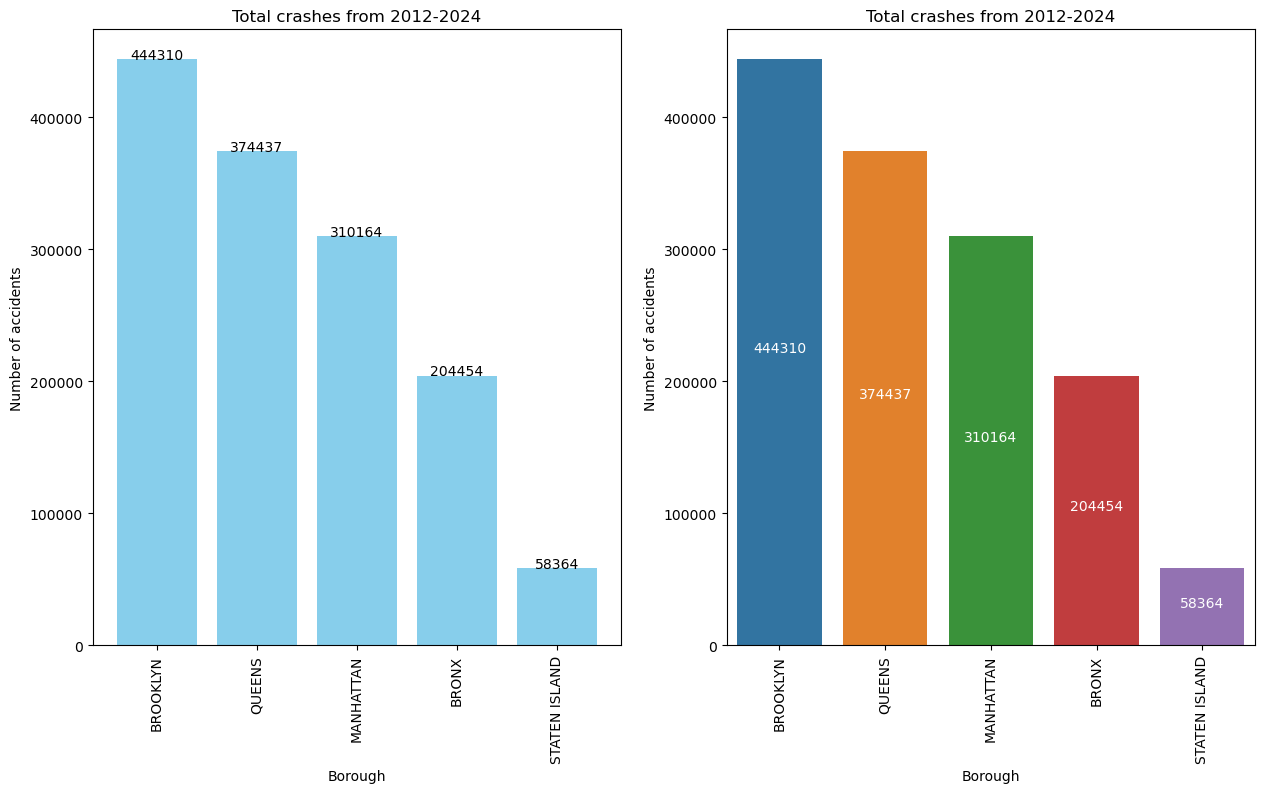

In [15]:
fig, ax = plt.subplots(1,2, figsize = (15,8))

def addlabels(x,y):
    for i in range(len(x)):
        ax[0].text(i, y[i], y[i], ha = 'center')

ax[0].bar(df1.index, df1.values, color = 'skyblue')
ax[0].set_title('Total crashes from 2012-2024')
ax[0].set_xlabel('Borough')
ax[0].set_ylabel('Number of accidents')
addlabels(df1.index, df1.values)

axs = sns.barplot(x = df1.index, y = df1.values , ax = ax[1])
ax[1].set_title('Total crashes from 2012-2024')
ax[1].set_xlabel('Borough')
ax[1].set_ylabel('Number of accidents')
for i, v in enumerate(df1.values):
   axs.text(i, v/2, str(v), ha='center', color='white')

for ax in ax:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()


### Total number of people injured or killed in crashes

In [16]:
df[['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED' ,'NUMBER OF PEDESTRIANS INJURED' ,'NUMBER OF PEDESTRIANS KILLED' ,'NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST INJURED','NUMBER OF MOTORIST KILLED']]

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
3,0.0,0.0,0,0,0,0,0,0
4,0.0,0.0,0,0,0,0,0,0
7,2.0,0.0,0,0,0,0,2,0
8,0.0,0.0,0,0,0,0,0,0
9,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2074185,1.0,0.0,0,0,0,0,1,0
2074186,0.0,0.0,0,0,0,0,0,0
2074187,1.0,0.0,1,0,0,0,0,0
2074188,0.0,0.0,0,0,0,0,0,0


In [17]:
df['NUMBER OF PERSONS INJURED'] = pd.to_numeric(df['NUMBER OF PERSONS INJURED'], errors='coerce')
df['NUMBER OF PERSONS KILLED'] = pd.to_numeric(df['NUMBER OF PERSONS KILLED'], errors='coerce')

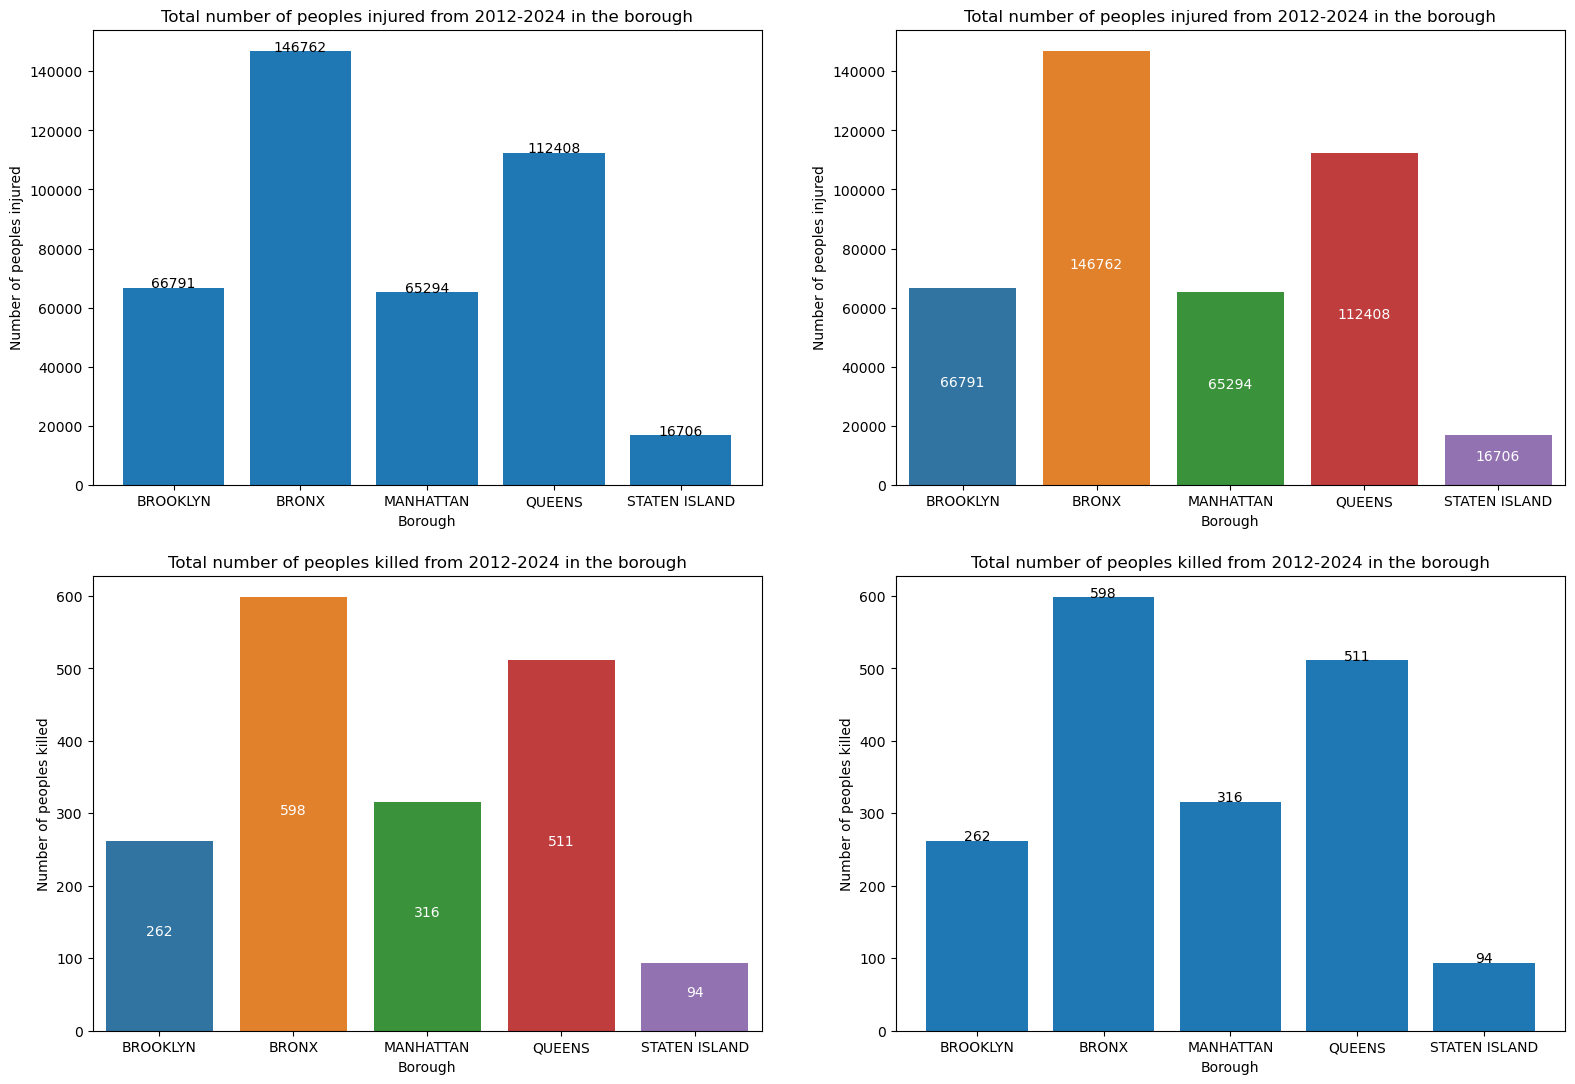

In [18]:
fig,ax = plt.subplots(2,2, figsize = (19, 13))

def addlabels(x,y,z1,z2):
    for i in range(len(x)):
        ax[z1,z2].text(i, y[i], y[i], ha = 'center')

x = df['BOROUGH']
y = df.groupby('BOROUGH')['NUMBER OF PERSONS INJURED'].sum()
z = df.groupby('BOROUGH')['NUMBER OF PERSONS KILLED'].sum()
        
ax[0,0].bar(x.unique() ,y)
ax[0,0].set_title('Total number of peoples injured from 2012-2024 in the borough')
ax[0,0].set_xlabel('Borough')
ax[0,0].set_ylabel('Number of peoples injured')
addlabels(x.unique() , y.astype(int),0,0)

axs1 = sns.barplot(x=x.unique(), y = y, ax = ax[0,1])
ax[0,1].set_title('Total number of peoples injured from 2012-2024 in the borough')
ax[0,1].set_xlabel('Borough')
ax[0,1].set_ylabel('Number of peoples injured')
for i, v in enumerate(y.astype(int)):
   axs1.text(i, v/2, str(v), ha='center', color='white')

axs2 = sns.barplot(x=x.unique(), y=z, ax = ax[1,0])
ax[1,0].set_title('Total number of peoples killed from 2012-2024 in the borough')
ax[1,0].set_xlabel('Borough')
ax[1,0].set_ylabel('Number of peoples killed')
for i, v in enumerate(z.astype(int)):
   axs2.text(i, v/2, str(v), ha='center', color='white')

ax[1,1].bar(x.unique() , z)
ax[1,1].set_title('Total number of peoples killed from 2012-2024 in the borough')
ax[1,1].set_xlabel('Borough')
ax[1,1].set_ylabel('Number of peoples killed')
addlabels(x.unique() , z.astype(int),1,1)

plt.show()

### Number of accidents by hour

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1391729 entries, 3 to 2074189
Data columns (total 29 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   CRASH DATE                     1391729 non-null  object 
 1   CRASH TIME                     1391729 non-null  object 
 2   BOROUGH                        1391729 non-null  object 
 3   ZIP CODE                       1391729 non-null  object 
 4   LATITUDE                       1391729 non-null  float64
 5   LONGITUDE                      1391729 non-null  float64
 6   LOCATION                       1391729 non-null  object 
 7   ON STREET NAME                 1085007 non-null  object 
 8   CROSS STREET NAME              1084472 non-null  object 
 9   OFF STREET NAME                306170 non-null   object 
 10  NUMBER OF PERSONS INJURED      1391718 non-null  float64
 11  NUMBER OF PERSONS KILLED       1391706 non-null  float64
 12  NUMBER OF PEDESTRIA

In [20]:
df.iloc[:,[18,19,20,21,22]]

,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5
3,Unspecified,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
7,Unspecified,Unspecified,NaN,NaN,NaN
8,Driver Inexperience,Unspecified,NaN,NaN,NaN
9,Passing Too Closely,Unspecified,NaN,NaN,NaN
...,...,...,...,...,...
2074185,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN
2074186,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN
2074187,Driver Inattention/Distraction,NaN,NaN,NaN,NaN
2074188,Passing Too Closely,Unspecified,NaN,NaN,NaN


In [21]:
df['CONTRIBUTING FACTOR VEHICLE 1'].unique()

array(['Unspecified', nan, 'Driver Inexperience', 'Passing Too Closely',
       'Turning Improperly', 'Reaction to Uninvolved Vehicle',
       'Steering Failure', 'Following Too Closely',
       'Passing or Lane Usage Improper', 'Driver Inattention/Distraction',
       'Oversized Vehicle', 'Unsafe Lane Changing', 'Alcohol Involvement',
       'View Obstructed/Limited', 'Traffic Control Disregarded',
       'Failure to Yield Right-of-Way', 'Aggressive Driving/Road Rage',
       'Unsafe Speed', 'Pavement Slippery', 'Illnes',
       'Lost Consciousness', 'Other Vehicular', 'Brakes Defective',
       'Backing Unsafely', 'Passenger Distraction', 'Fell Asleep',
       'Obstruction/Debris', 'Tinted Windows',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Animals Action', 'Drugs (illegal)', 'Outside Car Distraction',
       'Tire Failure/Inadequate', 'Pavement Defective', 'Fatigued/Drowsy',
       'Accelerator Defective', 'Physical Disability', 'Glare',
       'Driverl

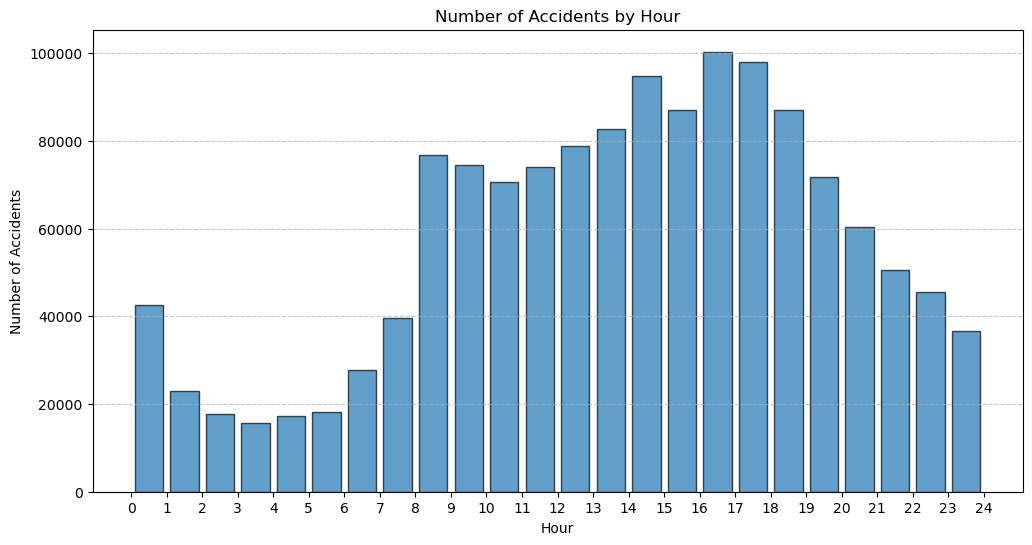

In [22]:
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M')

# Extract hour component
# df['Hour'] = df['CRASH TIME'].dt.hour

# # Count the number of accidents for each hour
# hourly_counts = df['Hour'].value_counts().sort_index()

df['Hour'] = df['CRASH TIME'].dt.hour

# Create histogram with time ranges
plt.figure(figsize=(12, 6))
plt.hist(df['Hour'], bins=range(0, 25), rwidth=0.8, alpha=0.7, edgecolor='black')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Hour')
plt.xticks(range(0, 25))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Total Number of accidents throughout the year

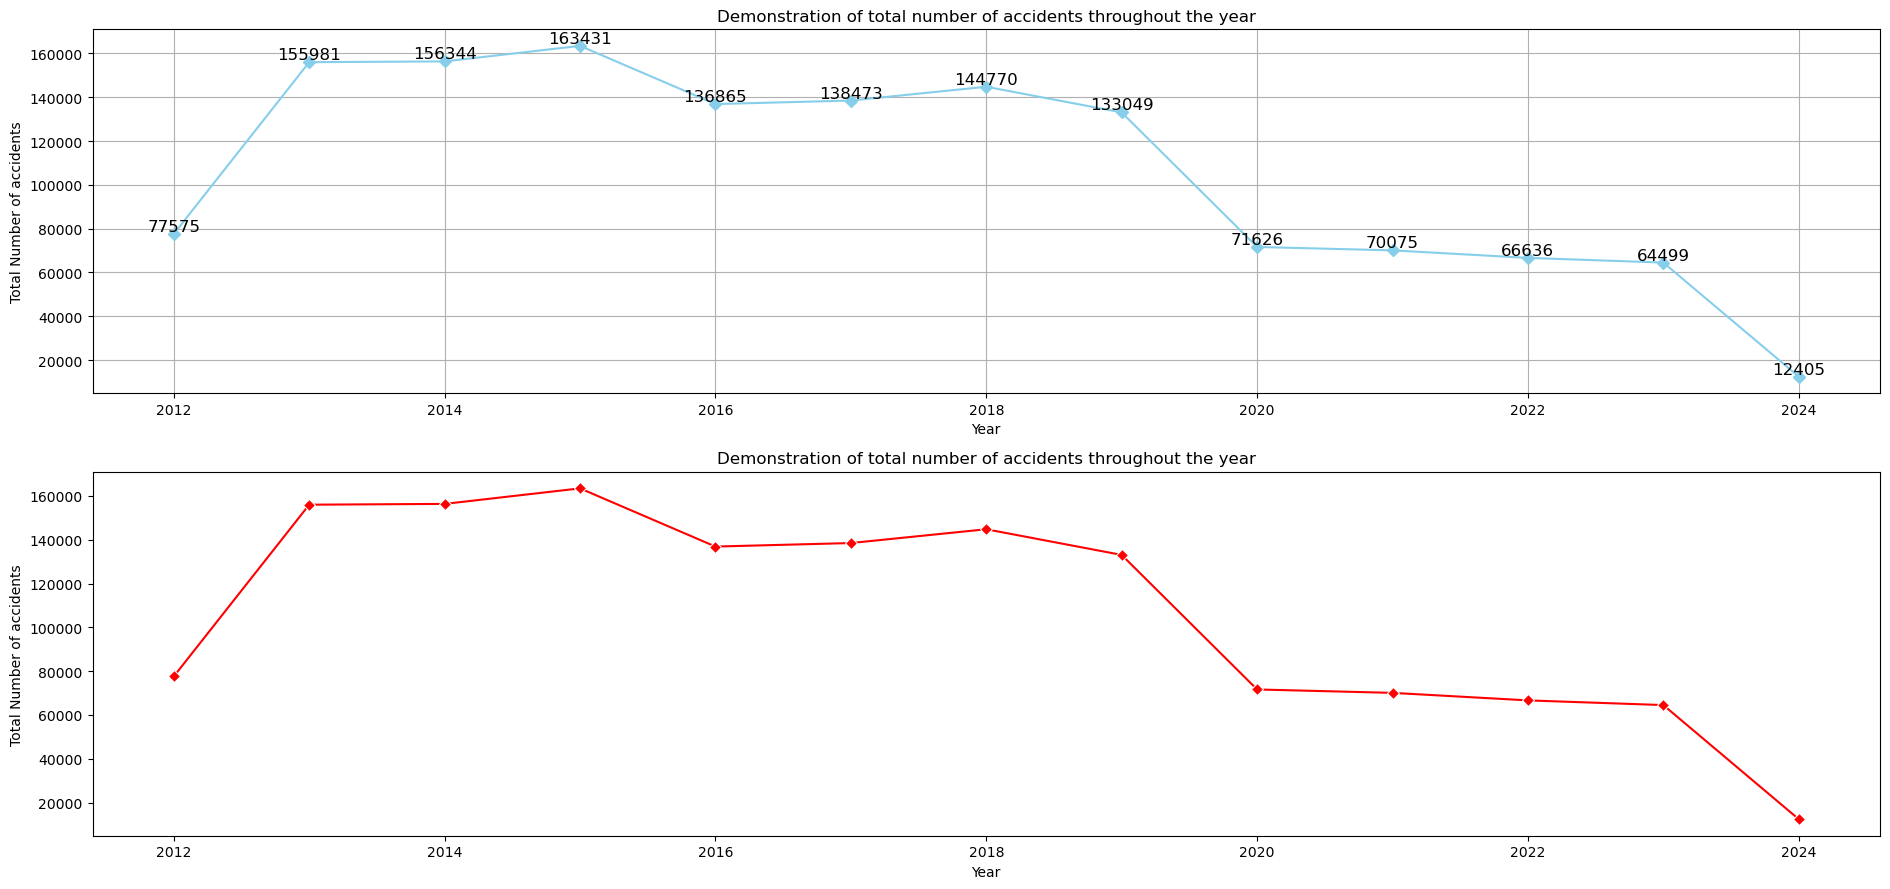

In [23]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

df['Year'] = df['CRASH DATE'].dt.year

yearly_counts = df['Year'].value_counts().sort_index()

fig, ax = plt.subplots(2,1,figsize = (19,9))
ax[0].plot(yearly_counts.index, yearly_counts.values, marker = 'D', color = 'skyblue')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Total Number of accidents')
ax[0].set_title('Demonstration of total number of accidents throughout the year')
ax[0].grid(True)
for x, y in zip(yearly_counts.index, yearly_counts.values):
    ax[0].text(x, y, str(y), ha='center', va='bottom', fontsize=12)
    
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker = 'D', color = 'red', ax = ax[1])
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Total Number of accidents')
ax[1].set_title('Demonstration of total number of accidents throughout the year')

plt.tight_layout()
plt.show()


### Streets where the most number of accidents occured

In [42]:
def street_barplot(x,y,name):
    plt.figure(figsize = (12,5))
    plt.barh(x,y)
    plt.title(f"Top 10 streets in the {name} and the number of accidents")
    plt.xlabel('Number of accidents')
    plt.ylabel('Name of street')
    plt.show()

In [43]:
df['street-name'] = df['BOROUGH'] + ',' + df['ON STREET NAME']
df0 = df['street-name'].value_counts().head(10)

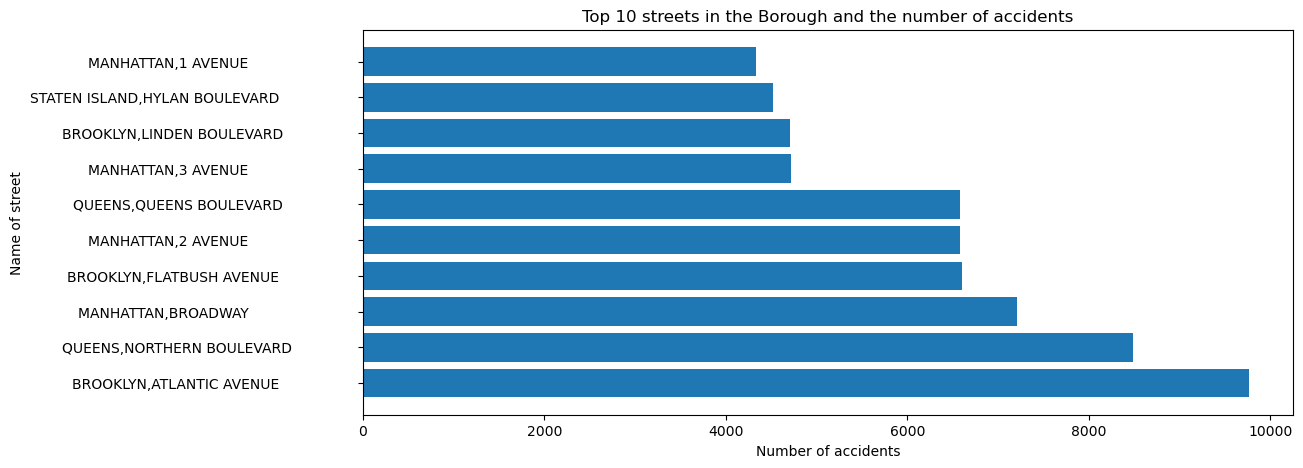

In [44]:
street_barplot(df0.index, df0.values, 'Borough')

### Top 10 streets in every Borough where most number of accidents occured

In [46]:
df1 = df[['BOROUGH', 'ON STREET NAME']]

In [47]:
bronx = df1[df1['BOROUGH'] == 'BRONX']
brooklyn = df1[df1['BOROUGH'] == 'BROOKLYN']
manhattan = df1[df1['BOROUGH'] == 'MANHATTAN']
queens = df1[df1['BOROUGH'] == 'QUEENS']
staten_island = df1[df1['BOROUGH'] == 'STATEN ISLAND']

In [26]:
bronx_street = bronx['ON STREET NAME'].value_counts()
top_bronx_street = bronx_street.head(10)

brooklyn_street = brooklyn['ON STREET NAME'].value_counts()
top_brooklyn_street = brooklyn_street.head(10)

manhattan_street = manhattan['ON STREET NAME'].value_counts()
top_manhattan_street = manhattan_street.head(10)

queens_street = queens['ON STREET NAME'].value_counts()
top_queens_street = queens_street.head(10)

staten_island_street = staten_island['ON STREET NAME'].value_counts()
top_staten_island_street = staten_island_street.head(10)

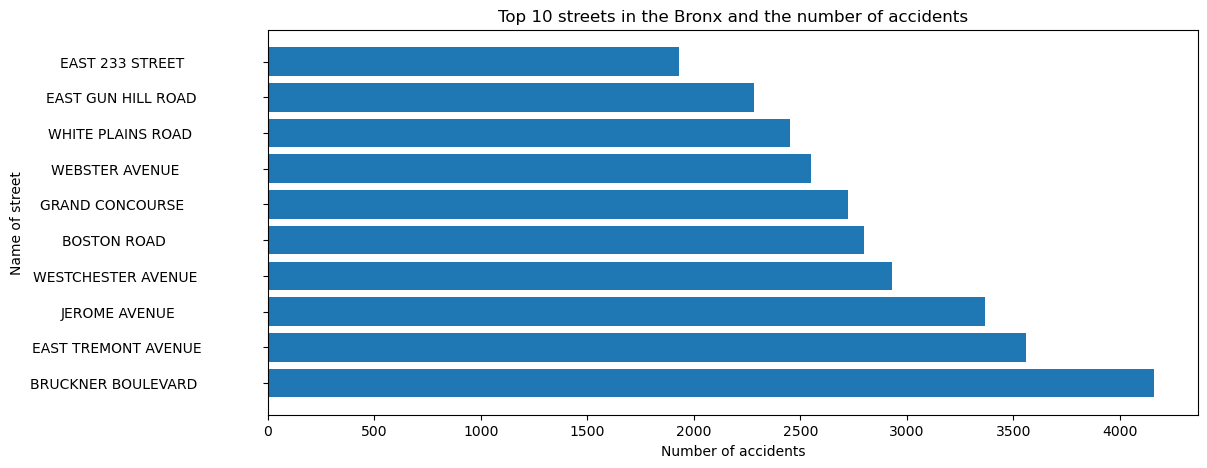

In [28]:
street_barplot(top_bronx_street.index, top_bronx_street.values, 'Bronx')

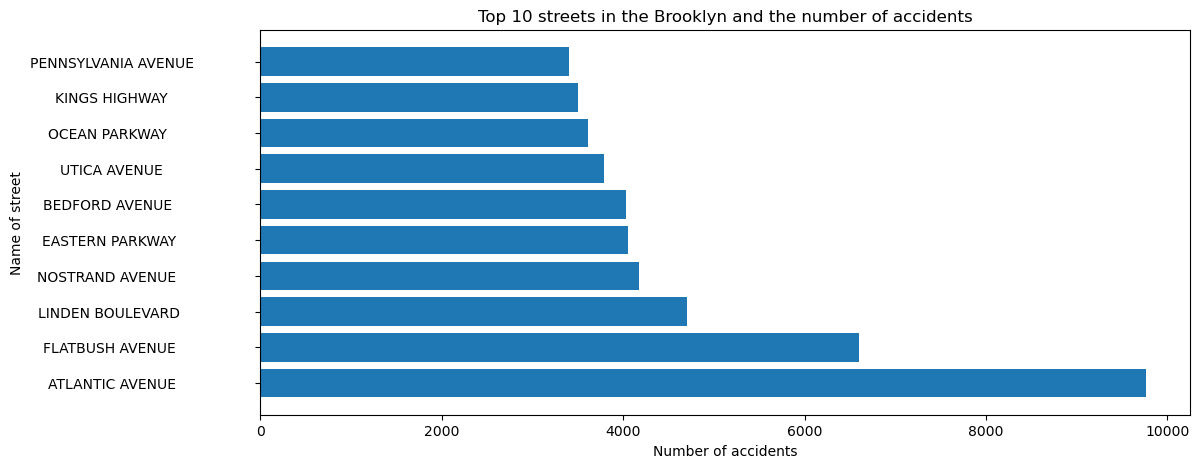

In [29]:
street_barplot(top_brooklyn_street.index, top_brooklyn_street.values, 'Brooklyn')

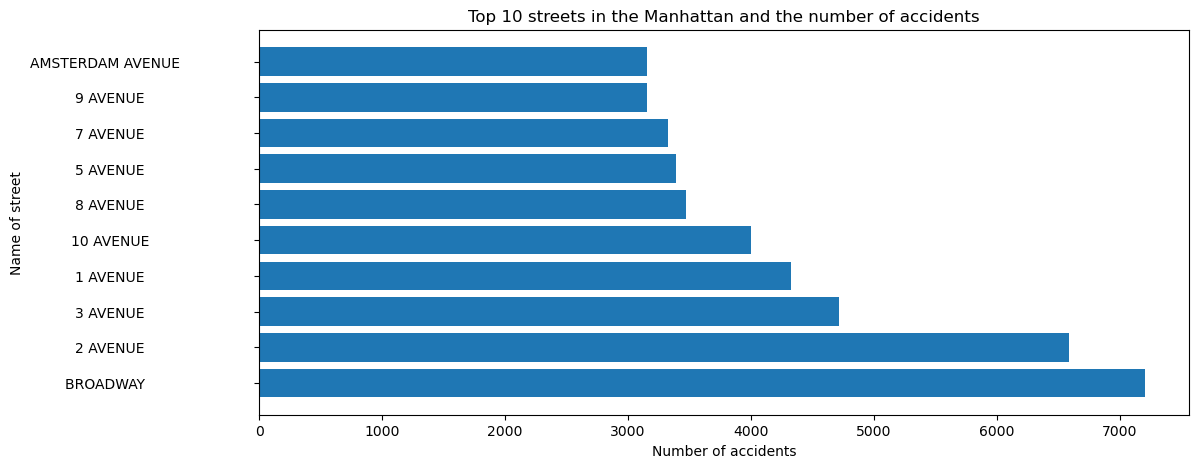

In [30]:
street_barplot(top_manhattan_street.index, top_manhattan_street.values, 'Manhattan')

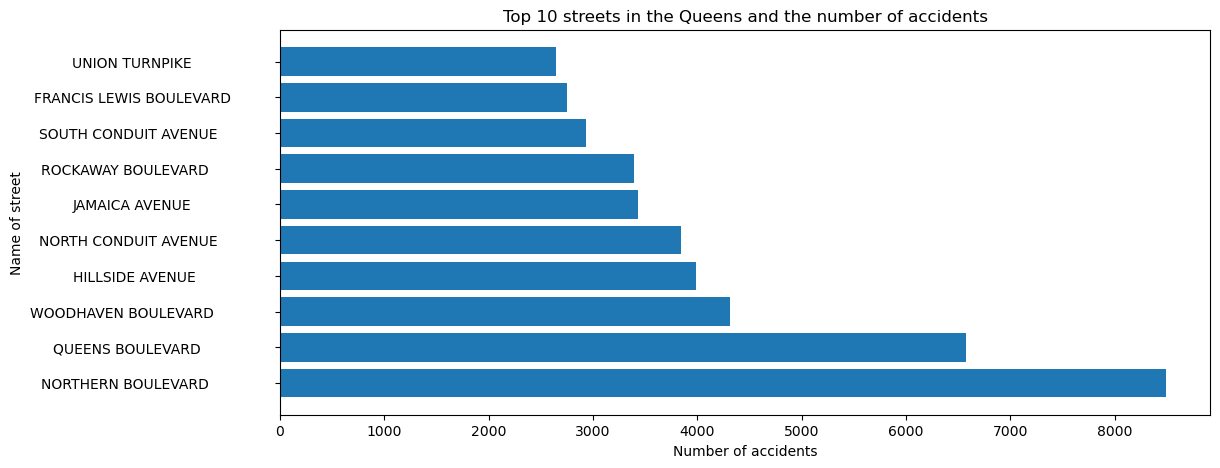

In [31]:
street_barplot(top_queens_street.index, top_queens_street.values, 'Queens')

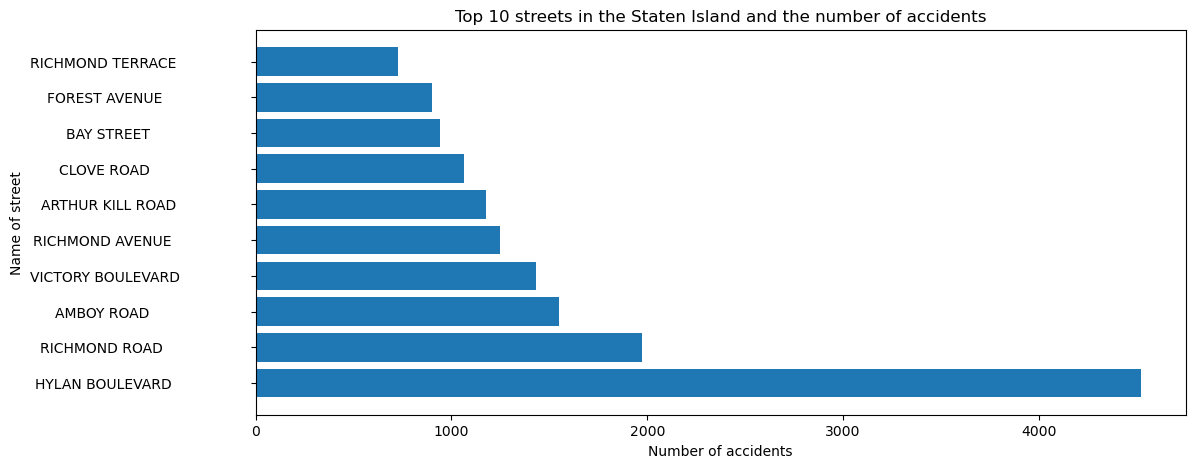

In [49]:
street_barplot(top_staten_island_street.index, top_staten_island_street.values, 'Staten Island')

### Visual analysis of crashes of each year of each month

In [54]:
df['Month'] = df['CRASH DATE'].dt.month

In [151]:
df2 = df[['Year', 'Month']]

In [183]:
df12 = df2.value_counts()
df12

Year  Month
2015  10       14999
      5        14515
2013  5        14337
2015  8        14213
      7        14163
               ...  
2023  2         4456
2021  2         4415
2020  5         3851
2024  3         2768
2020  4         2520
Name: count, Length: 141, dtype: int64

<Axes: xlabel='Month'>

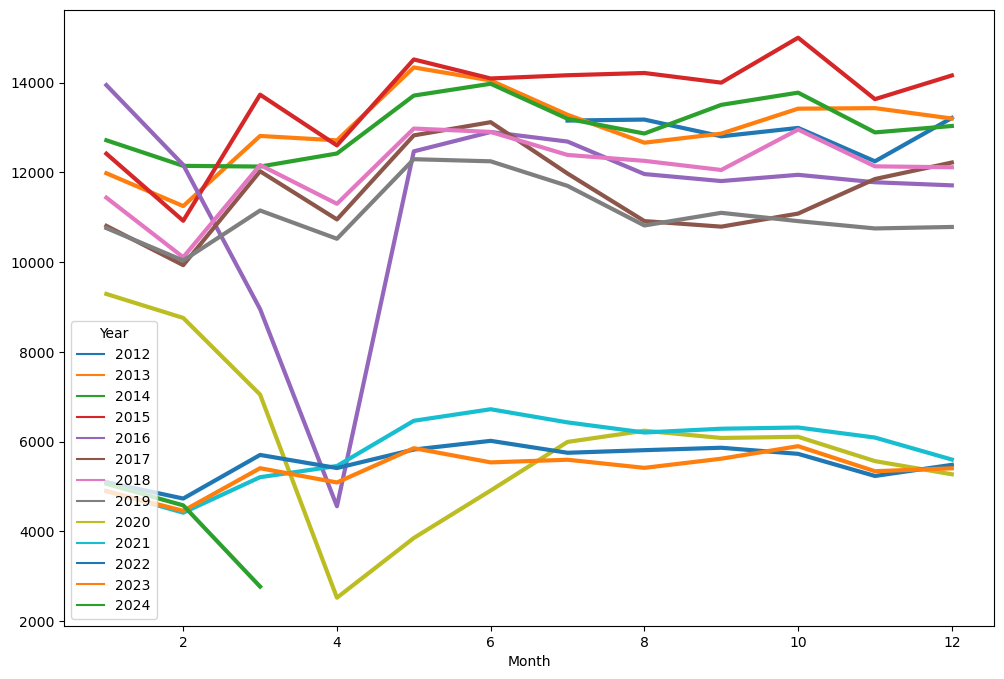

In [204]:
plt.figure(figsize = (12,8))
sns.lineplot(data = df12, x = 'Month',y = df12.values, hue = 'Year', palette = 'tab10', linewidth = 3.0)